
# COVID-Team-1
### Dr. Mohanty
### Christopher Brantley
### CSC 405 01
### Last Updated: 11/12/2020
### I, Christopher Brantley, have abided by the UNCG academic policy.

In [1]:
# Changing directory so we can import covid_data.
import os 
os.chdir("../")

## Imports.

In [2]:
import ipynb
from IPython.display import Image
from ipynb.fs.full import chris_covid_data as md
from ipynb.fs.full import covid_data as cd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.tools.eval_measures as smt

## Pandas Display Options.

In [3]:
# Telling pandas not convert to html tags.
pd.set_option('display.html.table_schema', True)
# Max columns and rows to display.
pd.set_option('display.max_columns', 15)
pd.set_option('display.max_rows', 8)

# Task 1.1: 

In [4]:
df_florida = md.get_state_daily_cases("FL")


In [5]:
def linear_non_models(df_data, d_type = ""):
    dict_rmse = {}
    for poly in range(1, 4):
        list_rmse = []
        pre_formula = "daily_type ~ 1 + days_passed"
        for x in range(2, poly + 1):
            #https://www.statsmodels.org/stable/examples/notebooks/generated/predict.html
            pre_formula  += "+ I(days_passed ** {:.1f})".format(x)
        figure = go.Figure()
        for county in df_data.index:
            series_county = df_data.loc[county]
            first_case_idx = 0
            for value in series_county.values:
                if value != 0:
                    break
                first_case_idx += 1
            x_value = len(series_county[first_case_idx:])
            x_values = np.arange(0, x_value)
            y_values = series_county[first_case_idx:].values
            df_daily_data = pd.DataFrame(columns = ["days_passed", "daily_type"],
                                    data = {"days_passed" : x_values.tolist(),
                                            "daily_type" : y_values.tolist(),
                                           })
            df_x = pd.DataFrame({"days_passed" : df_daily_data.index})
            cur_poly = smf.ols(formula = pre_formula,
                               data = df_daily_data,
                              ).fit()
            pred_y = cur_poly.predict(df_x)
            rmse = smt.rmse(df_daily_data.daily_type.values, pred_y)
            list_rmse.append([county, rmse])
            figure.add_trace(go.Scatter(x = df_daily_data.days_passed,
                                        y = pred_y,
                                        mode = "lines",
                                        name = "{} RMSE = {:.2f}".format(county, rmse),
                                       )
                            )
        figure.update_layout(
            title = "Poly n = {}".format(poly),
            xaxis_title = "Days Passed since Initial {}".format(d_type[0].upper() + d_type[1:-1]),
            yaxis_title = "Number of {}".format(d_type[0].upper() + d_type[1:]),
            legend_title = "Models",
        )
        figure.write_image("./chris/images/task1.1/{}{}.png".format(d_type, poly))

        #figure.show()
        dict_rmse[d_type + " " + str(poly)] = list_rmse
    return dict_rmse

In [6]:
def display_rmse(_dict_rmse, d_type, n_type):
    _
    counter = 0
    print("Counties".center(30, " "), "\t", "RMSE (n = {})".format(n_type).center(11, " "), end = "")
    print("Counties".center(30, " "), "\t", "RMSE (n = {})".format(n_type).center(11, " "), "\n")
    for case_rmse in _dict_rmse["{} {}".format(d_type, n_type)]:
        print(case_rmse[0].ljust(30, " "), "{:.2f}".format(case_rmse[1]).rjust(11, " "), end = "\t")
        if(counter % 2 == 1):
            print()
        counter += 1


# Utilize Linear and Non-Linear (polynomial) regression models to compare trends for a single state and its counties. Start your data from the first day of infections. X-Axis, number of days since the first case, Y-Axis number of new cases and deaths. Calcluate error using RMSE.

## Linear/Non-Linear Modeling of New Cases.

In [7]:
dict_cases_rmse = linear_non_models(md.get_state_daily_cases("FL"), "cases")

### Linear Modeling (n = 1) of New Cases.

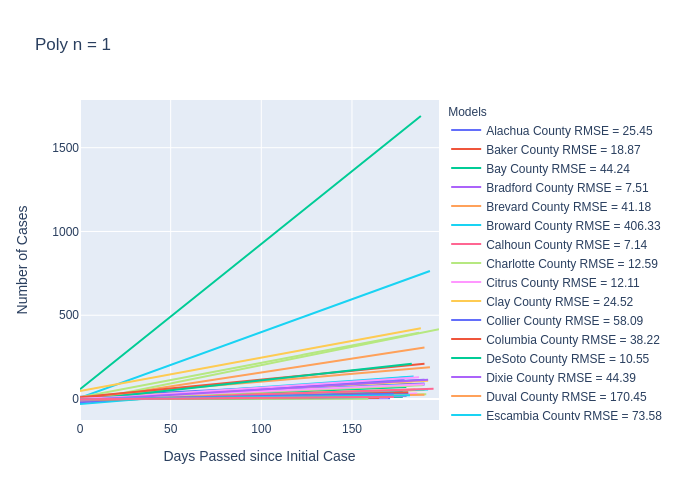

In [8]:
Image(filename = "./chris/images/task1.1/cases1.png")

In [9]:
display_rmse(dict_cases_rmse, "cases", 1)

           Counties            	 RMSE (n = 1)           Counties            	 RMSE (n = 1) 

Alachua County                       25.45	Baker County                         18.87	
Bay County                           44.24	Bradford County                       7.51	
Brevard County                       41.18	Broward County                      406.33	
Calhoun County                        7.14	Charlotte County                     12.59	
Citrus County                        12.11	Clay County                          24.52	
Collier County                       58.09	Columbia County                      38.22	
DeSoto County                        10.55	Dixie County                         44.39	
Duval County                        170.45	Escambia County                      73.58	
Flagler County                        7.31	Franklin County                      10.37	
Gadsden County                       18.48	Gilchrist County                      5.56	
Glades County                        

### Non-linear Modeling (n = 2) of New Cases.

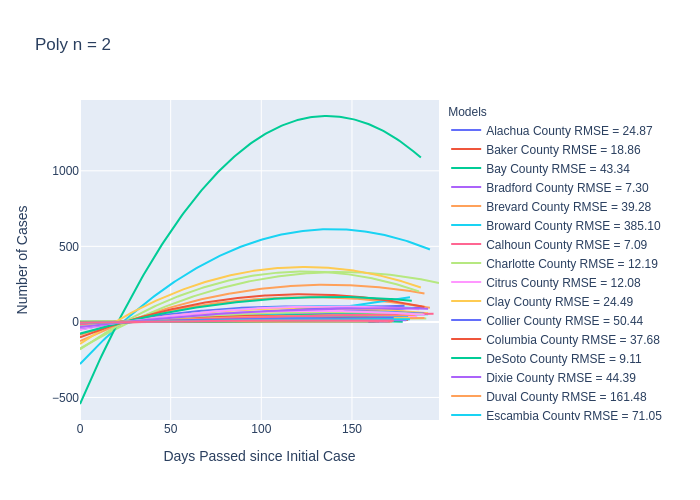

In [10]:
Image(filename = "./chris/images/task1.1/cases2.png")

In [11]:
display_rmse(dict_cases_rmse, "cases", 2)

           Counties            	 RMSE (n = 2)           Counties            	 RMSE (n = 2) 

Alachua County                       24.87	Baker County                         18.86	
Bay County                           43.34	Bradford County                       7.30	
Brevard County                       39.28	Broward County                      385.10	
Calhoun County                        7.09	Charlotte County                     12.19	
Citrus County                        12.08	Clay County                          24.49	
Collier County                       50.44	Columbia County                      37.68	
DeSoto County                         9.11	Dixie County                         44.39	
Duval County                        161.48	Escambia County                      71.05	
Flagler County                        7.31	Franklin County                      10.37	
Gadsden County                       18.44	Gilchrist County                      5.40	
Glades County                        

### Non-linear Modeling (n = 3) of New Cases.

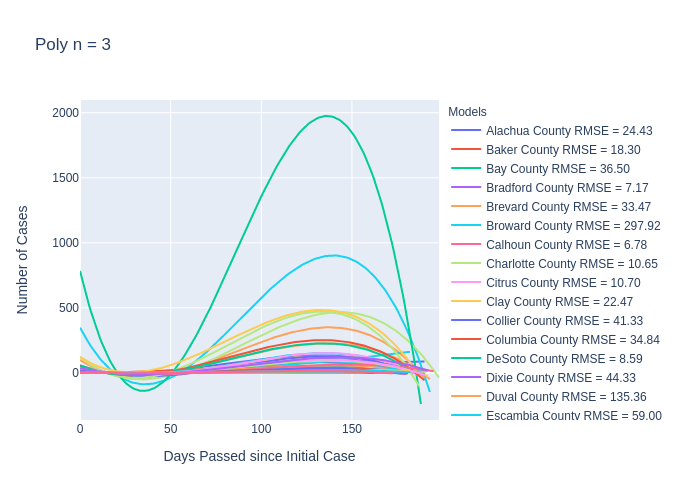

In [12]:
Image(filename = "./chris/images/task1.1/cases3.png")

In [13]:
display_rmse(dict_cases_rmse, "cases", 3)

           Counties            	 RMSE (n = 3)           Counties            	 RMSE (n = 3) 

Alachua County                       24.43	Baker County                         18.30	
Bay County                           36.50	Bradford County                       7.17	
Brevard County                       33.47	Broward County                      297.92	
Calhoun County                        6.78	Charlotte County                     10.65	
Citrus County                        10.70	Clay County                          22.47	
Collier County                       41.33	Columbia County                      34.84	
DeSoto County                         8.59	Dixie County                         44.33	
Duval County                        135.36	Escambia County                      59.00	
Flagler County                        6.91	Franklin County                       9.94	
Gadsden County                       17.24	Gilchrist County                      5.19	
Glades County                        

## Linear/Non-Linear Modeling of New Deaths.

In [14]:
dict_deaths_rmse = linear_non_models(md.get_state_daily_deaths("FL"), "deaths")

### Linear Modeling (n = 1) of New Deaths.

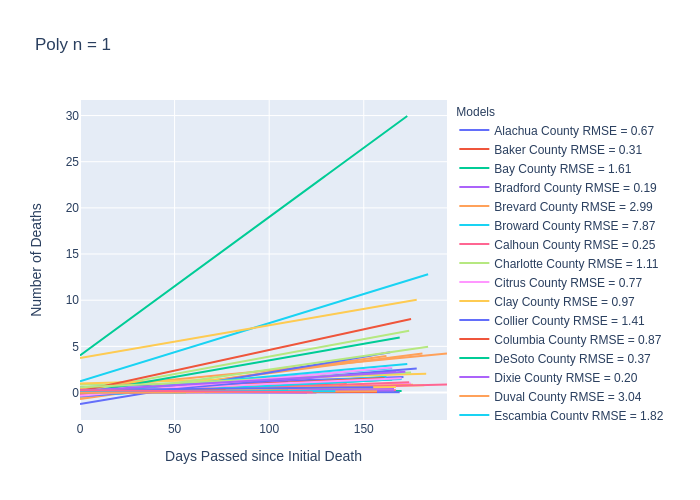

In [15]:
Image(filename = "./chris/images/task1.1/deaths1.png")

In [16]:
display_rmse(dict_deaths_rmse, "deaths", 1)

           Counties            	 RMSE (n = 1)           Counties            	 RMSE (n = 1) 

Alachua County                        0.67	Baker County                          0.31	
Bay County                            1.61	Bradford County                       0.19	
Brevard County                        2.99	Broward County                        7.87	
Calhoun County                        0.25	Charlotte County                      1.11	
Citrus County                         0.77	Clay County                           0.97	
Collier County                        1.41	Columbia County                       0.87	
DeSoto County                         0.37	Dixie County                          0.20	
Duval County                          3.04	Escambia County                       1.82	
Flagler County                        0.39	Franklin County                       0.22	
Gadsden County                        1.01	Gilchrist County                      0.46	
Glades County                        

### Non-linear Modeling (n = 2) of New Deaths.

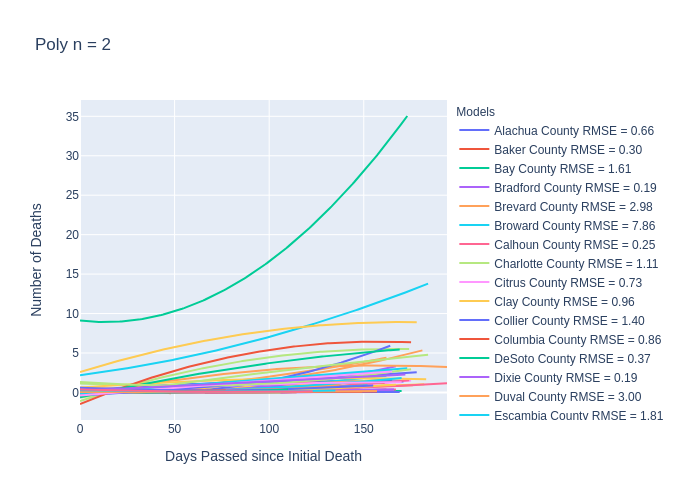

In [17]:
Image(filename = "./chris/images/task1.1/deaths2.png")

In [18]:
display_rmse(dict_deaths_rmse, "deaths", 2)

           Counties            	 RMSE (n = 2)           Counties            	 RMSE (n = 2) 

Alachua County                        0.66	Baker County                          0.30	
Bay County                            1.61	Bradford County                       0.19	
Brevard County                        2.98	Broward County                        7.86	
Calhoun County                        0.25	Charlotte County                      1.11	
Citrus County                         0.73	Clay County                           0.96	
Collier County                        1.40	Columbia County                       0.86	
DeSoto County                         0.37	Dixie County                          0.19	
Duval County                          3.00	Escambia County                       1.81	
Flagler County                        0.39	Franklin County                       0.22	
Gadsden County                        1.01	Gilchrist County                      0.45	
Glades County                        

### Non-linear Modeling (n = 3) of New Deaths.

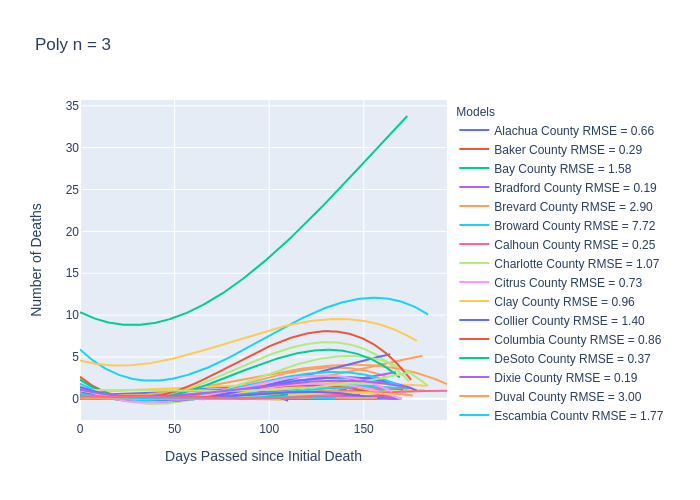

In [19]:
Image(filename = "./chris/images/task1.1/deaths3.png")

In [20]:
display_rmse(dict_deaths_rmse, "deaths", 3)

           Counties            	 RMSE (n = 3)           Counties            	 RMSE (n = 3) 

Alachua County                        0.66	Baker County                          0.29	
Bay County                            1.58	Bradford County                       0.19	
Brevard County                        2.90	Broward County                        7.72	
Calhoun County                        0.25	Charlotte County                      1.07	
Citrus County                         0.73	Clay County                           0.96	
Collier County                        1.40	Columbia County                       0.86	
DeSoto County                         0.37	Dixie County                          0.19	
Duval County                          3.00	Escambia County                       1.77	
Flagler County                        0.39	Franklin County                       0.21	
Gadsden County                        1.01	Gilchrist County                      0.45	
Glades County                        

# Task 1.2: 

In [21]:
df_florida = md.get_state_daily_cases("FL")

In [22]:
def linear_non_models(_county, d_type = ""):
    figure = go.Figure()
    series_county = df_florida.loc[_county]
    first_case_idx = 0
    for value in series_county.values:
        if value != 0:
            break
        first_case_idx += 1
    x_value = len(series_county[first_case_idx:])
    x_values = np.arange(0, x_value)
    y_values = series_county[first_case_idx:].values
    df_daily_data = pd.DataFrame(columns = ["days_passed", "daily_type"],
                                 data = {"days_passed" : x_values.tolist(),
                                         "daily_type" : y_values.tolist(),
                                        })
    df_x = pd.DataFrame({"days_passed" : df_daily_data.index})
    figure.add_trace(go.Scatter(x = df_daily_data["days_passed"], 
                                y = df_daily_data["daily_type"],
                                mode = "markers",
                                name = "Actual Data")
                    )
    for poly in range(1, 4):
        pre_formula = "daily_type ~ 1 + days_passed"
        for x in range(2, poly + 1):
            #https://www.statsmodels.org/stable/examples/notebooks/generated/predict.html
            pre_formula  += "+ I(days_passed ** {:.1f})".format(x)
        cur_poly = smf.ols(formula = pre_formula,
                           data = df_daily_data,
                          ).fit()
        pred_y = cur_poly.predict(df_x)
        rmse = smt.rmse(df_daily_data.daily_type.values, pred_y)
        figure.add_trace(go.Scatter(x = df_daily_data.days_passed,
                                    y = pred_y,
                                    mode = "lines",
                                    name = "{} (n = {}) RMSE = {:.2f}".format(_county, poly, rmse),
                                   )
                        )
    figure.update_layout(
        title = "Linear/Non-Linear Models - {}".format(_county),
        xaxis_title = "Days Passed since Initial {}".format(d_type[0].upper() + d_type[1:-1]),
        yaxis_title = "Number of {}".format(d_type[0].upper() + d_type[1:]),
        legend_title = "Models",
    )
    figure.write_image("./chris/images/task1.2/{}-{}.png".format(_county, d_type))
    #figure.show()

In [23]:
top_5_counties = ["Miami-Dade County", "Broward County", "Palm Beach County",
                  "Orange County", "Hillsborough County"]
dict_rmse_all = {}
for dtype in ["cases", "deaths"]:
    for county in top_5_counties:
        linear_non_models(county, dtype)

# Identify which counties are most at risk. Model for top 5 counties with cases within a state and observe their trends.

#### For Poly n = 1 cases: Miami-Dade County, Broward County, Palm Beach County, Orange County, Hillsborough County are top performers.
#### For Poly n = 2 cases: Miami-Dade County, Broward County, Palm Beach County, Orange County, Hillsborough County are top performers.
#### For Poly n = 3 cases: Miami-Dade County, Broward County, Palm Beach County, Orange County, Hillsborough County are top performers.

### So we can tell that Miami-Dade County, Broward County, Palm Beach County, Orange County, Hillsborough County are our top performers in all models. This means that these counties are at most risk.

## Models of Top Performing Counties by Cases

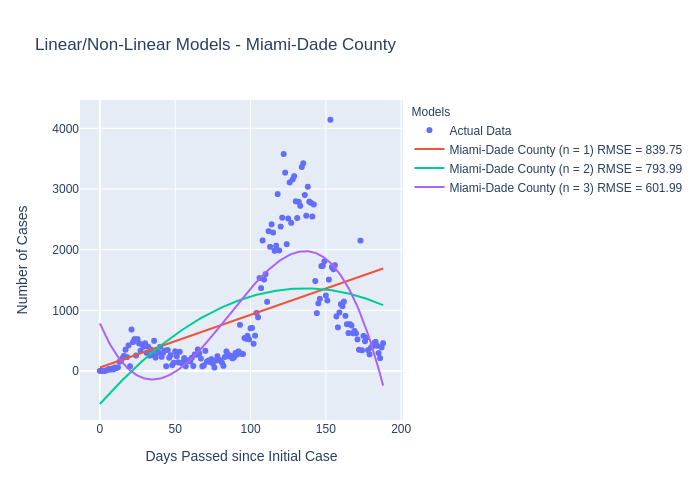

In [24]:
Image(filename = "./chris/images/task1.2/Miami-Dade County-cases.png")

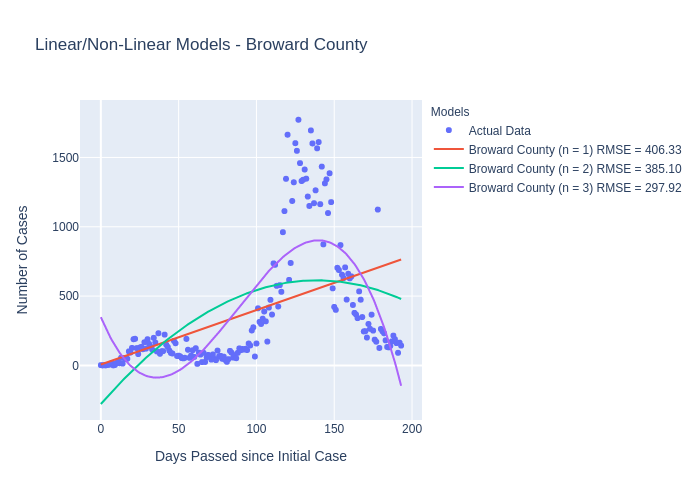

In [25]:
Image(filename = "./chris/images/task1.2/Broward County-cases.png")

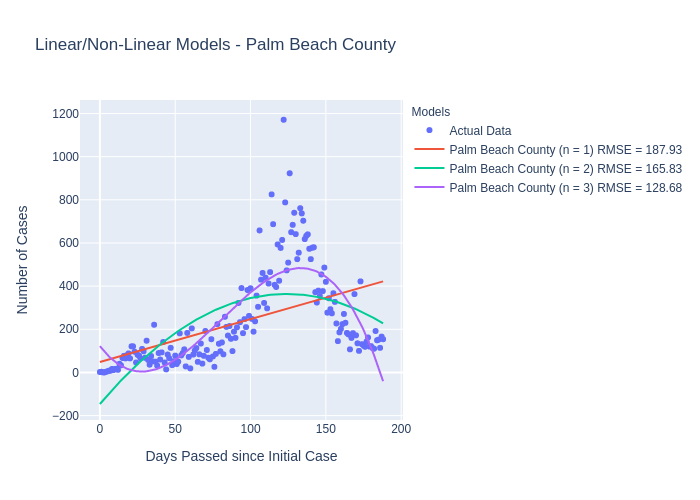

In [26]:
Image(filename = "./chris/images/task1.2/Palm Beach County-cases.png")

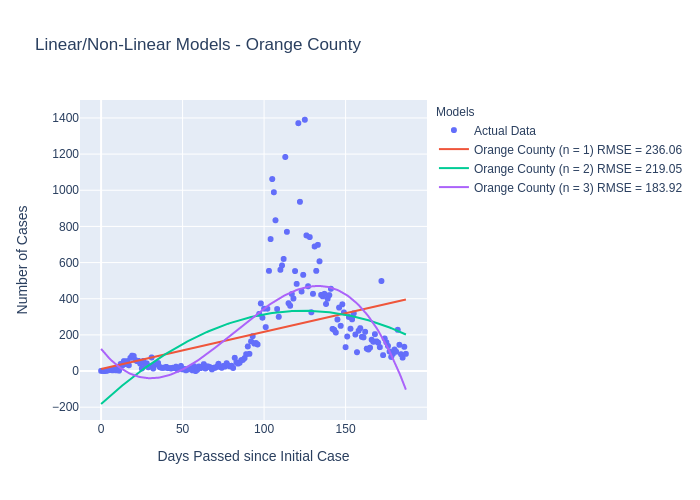

In [27]:
Image(filename = "./chris/images/task1.2/Orange County-cases.png")

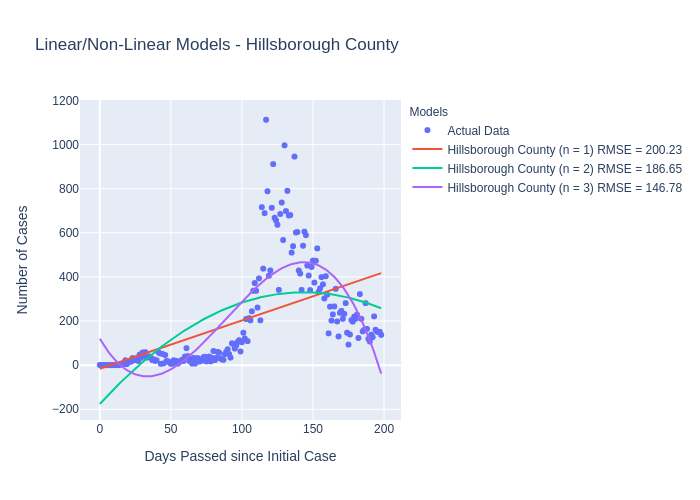

In [28]:
Image(filename = "./chris/images/task1.2/Hillsborough County-cases.png")

## Models of Top Performing Counties by Deaths

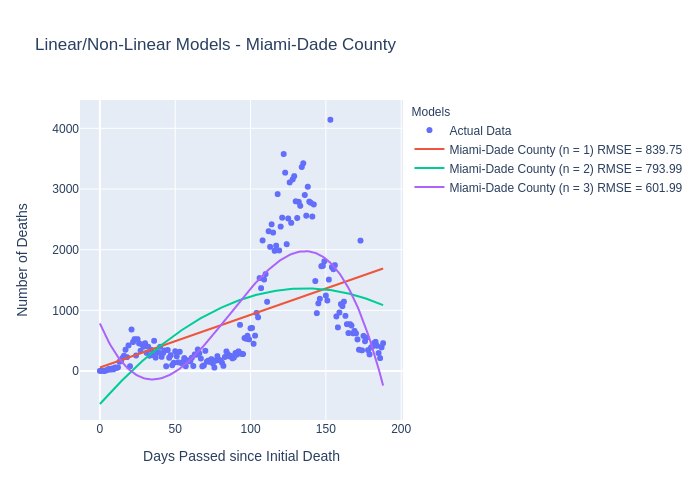

In [29]:
Image(filename = "./chris/images/task1.2/Miami-Dade County-deaths.png")

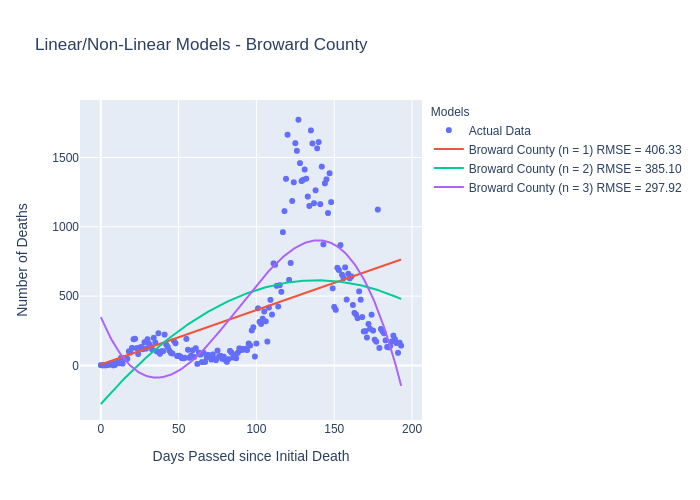

In [30]:
Image(filename = "./chris/images/task1.2/Broward County-deaths.png")

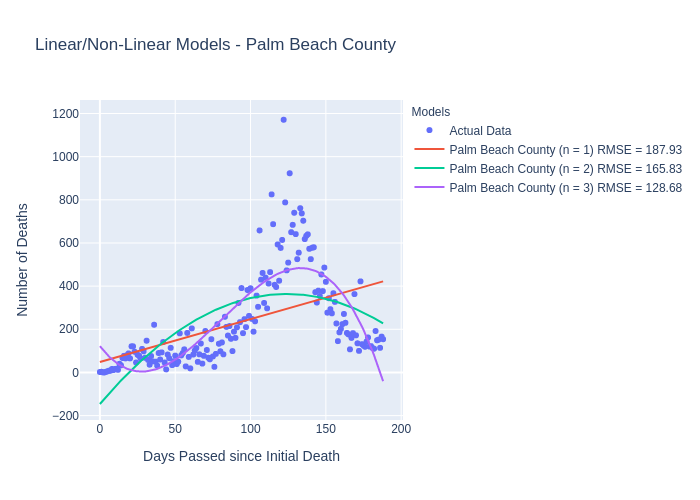

In [31]:
Image(filename = "./chris/images/task1.2/Palm Beach County-deaths.png")

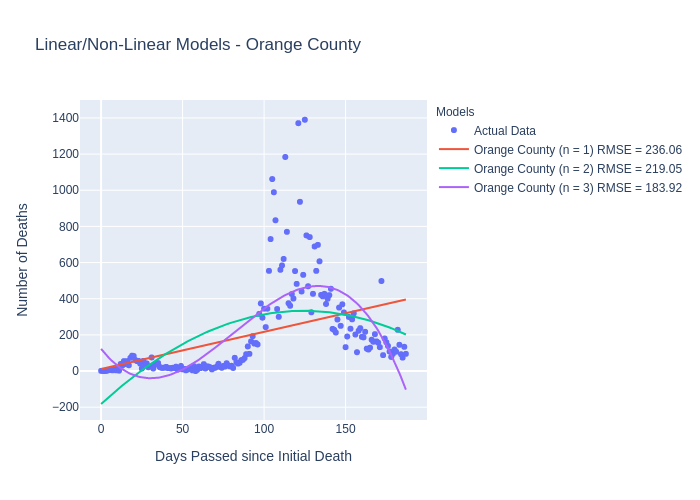

In [32]:
Image(filename = "./chris/images/task1.2/Orange County-deaths.png")

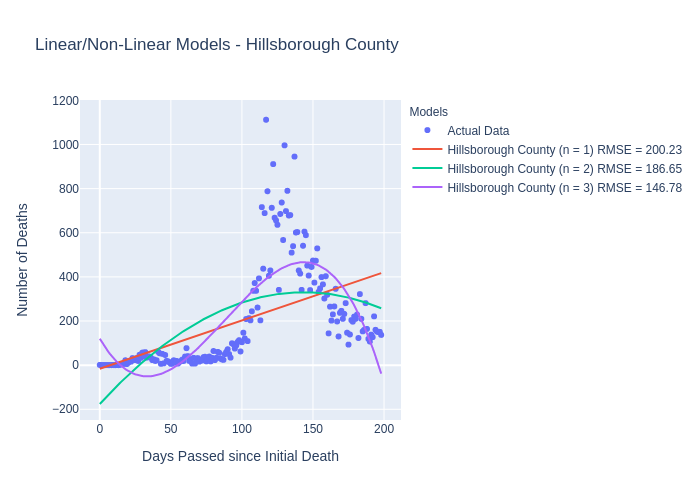

In [33]:
Image(filename = "./chris/images/task1.2/Hillsborough County-deaths.png")

# Task 1.3: 
# Utilize the hospital data to calculate the point of no return for a state. Use percentage occupancy / utilization to see which states are close and what their trend looks like.

# Task 1.4: 
# Utilize decision tree, random forest, and ARIMA (https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/) based models to compare and contrast the performance of each. X-variable is the previous weeks data, Y-variable is current week data. So you are predicting one week in advance. Calculate RMSE error. This is just based on number of cases. 

# Task 1.5
# Use 5 different variables from the enrichment data to predict the spread rate (cases and deaths) of COVID-19 in a county. Compare Random Forest and Decision Trees (RMSE error).

## For example, percentage of population in certain age-group, socio-economic status, public transportation, work from home, etc.

## Show the relative importance of variables and explain why. 